In [1]:
from google.colab import  drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/

/content/drive/My Drive


In [3]:
%cd Cirq

/content/drive/My Drive/Cirq


In [18]:
import cirq
import time
import cupy as cp
start_time = time.time()
function=0
Dtime_result = []
for n in range(3,28):
  q = [cirq.NamedQubit("a"+str(i)) for i in range(n)]
  circuit = cirq.Circuit()
  moments = [cirq.H(q[i]) for i in range(n)]
  if function!=None:
      for i in range(n-1):
        # moments += [cirq.T(q[i])]
        moments += [cirq.CNOT(q[i], q[-1])]
      # moments += [cirq.Moment([cirq.CNOT(q[i], q[-1]), cirq.T(q[i], q[-1])]) for i in range(n-1)]
      # moments += [cirq.T(q[i], q[-1]) for i in range(n-1)]

  moments += [cirq.H(q[i]) for i in range(n-1)]
  circuit.append(moments)

  simulator = cirq.Simulator()
  initial_state = cp.array([0]*(2**n))
  initial_state[1] = 1
  results = simulator.simulate(circuit, initial_state=initial_state, qubit_order=q)
  Dtime_result.append(time.time() - start_time)

In [19]:
Dtime_result

[0.009003400802612305,
 0.015398502349853516,
 0.022097349166870117,
 0.029451847076416016,
 0.03789329528808594,
 0.04783821105957031,
 0.05934476852416992,
 0.0735926628112793,
 0.0860743522644043,
 0.10019946098327637,
 0.1159520149230957,
 0.13340282440185547,
 0.15311098098754883,
 0.17700982093811035,
 0.20734310150146484,
 0.24683594703674316,
 0.3053858280181885,
 0.40038537979125977,
 0.5783669948577881,
 0.9137158393859863,
 1.5664787292480469,
 2.91312837600708,
 5.566789627075195,
 10.868208408355713,
 21.741682052612305]

In [11]:
import cupy as cp
import cirq
import time
from cirq.experiments.google_v2_supremacy_circuit import *
def experiment(n, cz_depth, seed):
  qubits = [cirq.GridQubit(i,j) for i in range(n) for j in range(n)]
  circuit = generate_boixo_2018_supremacy_circuits_v2(qubits=qubits, cz_depth=cz_depth, seed=seed)
  m = n**2
  initial_state_vector = cp.array([0]*2**m)
  initial_state_vector[0] = 1
  time_result = []
  for p in range(10):
    start_time = time.time()
    simulator = cirq.Simulator()
    results = simulator.simulate(circuit, initial_state = initial_state_vector, qubit_order = qubits)
    time_result.append(time.time() - start_time)
  time_result = cp.array(time_result)
  return circuit, results, cp.mean(time_result)

In [15]:
time_results = []
for n in range(2,6):
  circuit, result, x = experiment(n,2*n,2)
  time_results.append(x)

y1 = np.array(time_results)

# These numbers are from the supremacy_cir_with_numpy
y2 = np.array([0.00441136360168457, 0.00752265453338623, 0.049198246002197264, 35.78376975059509])

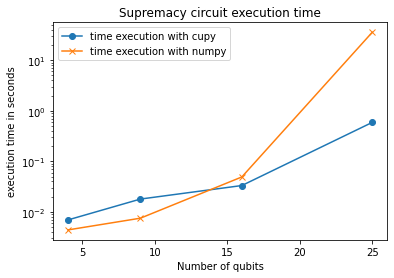

In [16]:
# Ploting the supremacy circuits' execution time
import matplotlib.pyplot as plt
import numpy as np
x = np.array([n**2 for n in range(2,6)])
plt.figure()
plt.plot(x,y1, label="time execution with cupy", marker='o')
plt.yscale('log')
plt.plot(x,y2, label="time execution with numpy", marker="x")
plt.yscale('log')
plt.xlabel("Number of qubits")
plt.ylabel("execution time in seconds")
plt.title("Supremacy circuit execution time")
plt.legend()

In [20]:
# Deutsch alg execution time with cupy 
y3 = Dtime_result

# These numbers are from supremacy_cir_with_numpy
y4 = [0.006359100341796875,
0.00813913345336914,
0.010207653045654297,
0.012632369995117188,
0.01600813865661621,
0.019311904907226562,
0.02338576316833496,
0.0279080867767334,
0.0330355167388916,
0.03967452049255371,
0.047902584075927734,
0.05907177925109863,
0.07630372047424316,
0.10543036460876465,
0.15909790992736816,
0.2618122100830078,
0.4690206050872803,
0.8986966609954834,
1.807861328125,
3.7497453689575195,
7.830322742462158,
16.081677198410034,
32.89058303833008,
67.8240385055542,
138.53874135017395]

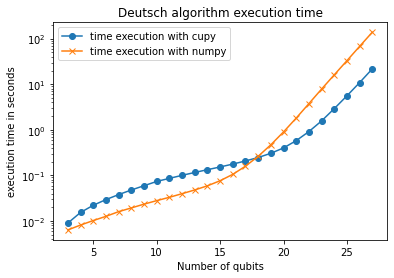

In [21]:
# Plotting Deutsch alg execution 
import matplotlib.pyplot as plt
import numpy as np
y3 = np.array(y3)
y4 = np.array(y4)
x = np.array(range(3,28))
plt.figure()
plt.plot(x,y3, label="time execution with cupy", marker="o")
plt.yscale('log')
plt.plot(x,y4, label="time execution with numpy", marker="x")
plt.yscale('log')
plt.xlabel("Number of qubits")
plt.ylabel("execution time in seconds")
plt.title("Deutsch algorithm execution time")
plt.legend()